In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df = pd.read_csv('Melbourne_housing_FULL.csv')

# Data Cleaning and Formatting

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [4]:
# Remove Null values
df = df.dropna(subset=['Price', 'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude'])

# Drop columns that I think are unnecessary
df = df.drop(columns=['Car', 'BuildingArea', 'Propertycount'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10613 entries, 2 to 34856
Data columns (total 18 columns):
Suburb         10613 non-null object
Address        10613 non-null object
Rooms          10613 non-null int64
Type           10613 non-null object
Price          10613 non-null float64
Method         10613 non-null object
SellerG        10613 non-null object
Date           10613 non-null object
Distance       10613 non-null float64
Postcode       10613 non-null float64
Bedroom2       10613 non-null float64
Bathroom       10613 non-null float64
Landsize       10613 non-null float64
YearBuilt      10613 non-null float64
CouncilArea    10613 non-null object
Lattitude      10613 non-null float64
Longtitude     10613 non-null float64
Regionname     10613 non-null object
dtypes: float64(9), int64(1), object(8)
memory usage: 1.5+ MB


In [6]:
df.shape

(10613, 18)

In [7]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


# Exploratory Data Analysis

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,Lattitude,Longtitude
count,10613.000000,1.061300e+04,10613.000000,10613.000000,10613.000000,10613.000000,10613.000000,10613.000000,10613.000000,10613.000000
mean,3.053708,1.085593e+06,10.973193,3111.815321,3.035240,1.623952,524.087251,1965.239800,-37.805851,144.992725
std,0.971677,6.733214e+05,6.715049,110.379781,0.971165,0.712033,1087.675830,36.981812,0.088895,0.116284
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790
25%,2.000000,6.370000e+05,6.300000,3044.000000,2.000000,1.000000,197.000000,1945.000000,-37.858200,144.923700
50%,3.000000,8.950000e+05,9.900000,3084.000000,3.000000,2.000000,460.000000,1970.000000,-37.801000,144.998900
75%,4.000000,1.335000e+06,13.900000,3151.000000,4.000000,2.000000,651.000000,1999.000000,-37.751420,145.062850
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,42800.000000,2019.000000,-37.407200,145.526350


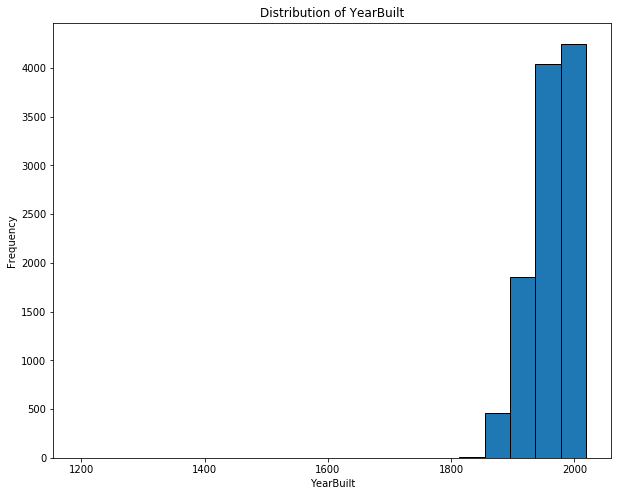

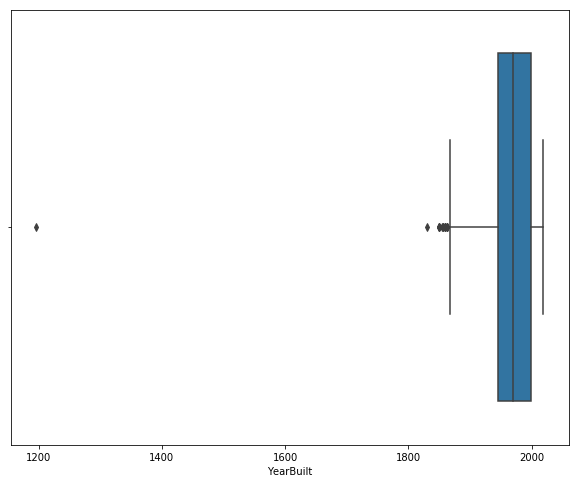

In [9]:
# Visualize Year built
plt.figure(figsize=(10,8))
plt.hist(df['YearBuilt'], bins=20, edgecolor='k')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
plt.title('Distribution of YearBuilt')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['YearBuilt'])
plt.show()

In [10]:
# Remove Outliers of houses older than 1800 because there are so few
df = df[df['YearBuilt']>=1860]

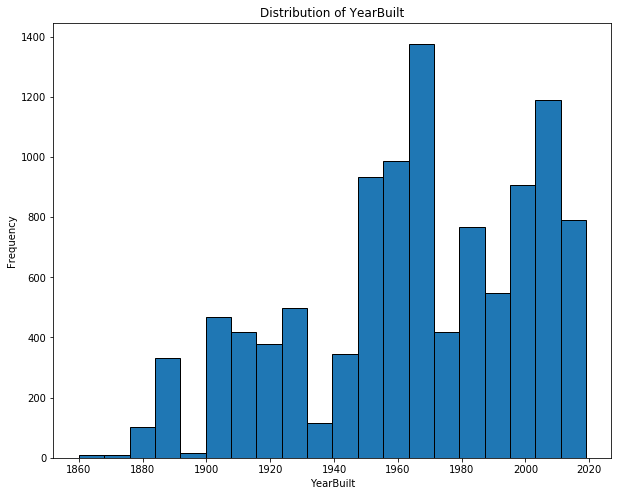

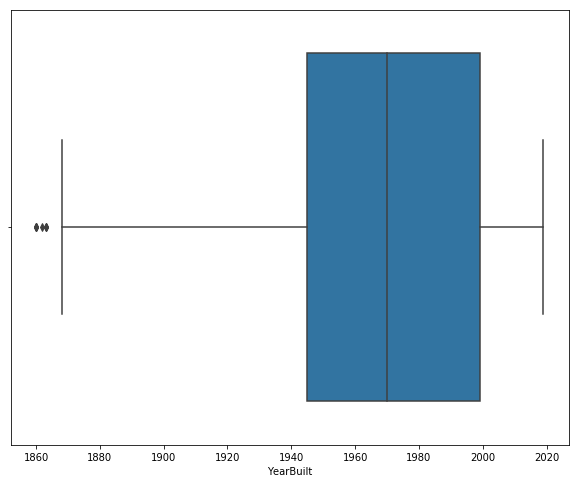

In [11]:
# Visualize Year built
plt.figure(figsize=(10,8))
plt.hist(df['YearBuilt'], bins=20, edgecolor='k')
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
plt.title('Distribution of YearBuilt')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['YearBuilt'])
plt.show()

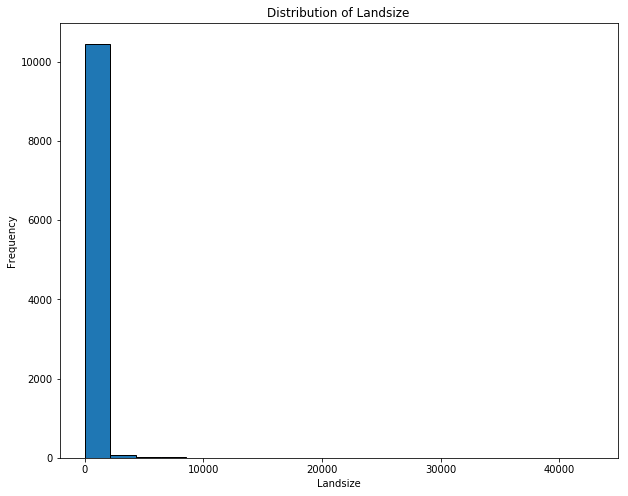

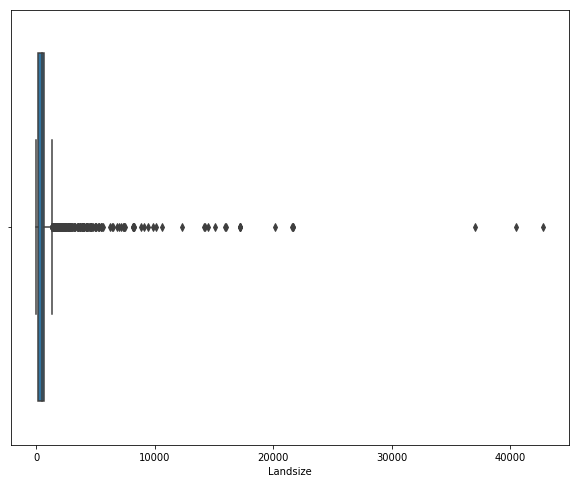

In [12]:
# Visualize Landsize
plt.figure(figsize=(10,8))
plt.hist(df['Landsize'], bins=20, edgecolor='k')
plt.xlabel('Landsize')
plt.ylabel('Frequency')
plt.title('Distribution of Landsize')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['Landsize'])
plt.show()

In [13]:
# Remove Outliers from Landsize
df = df[df['Landsize']<=1400]

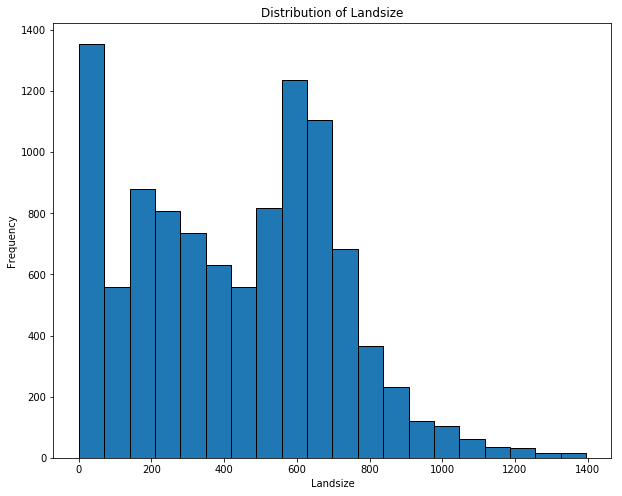

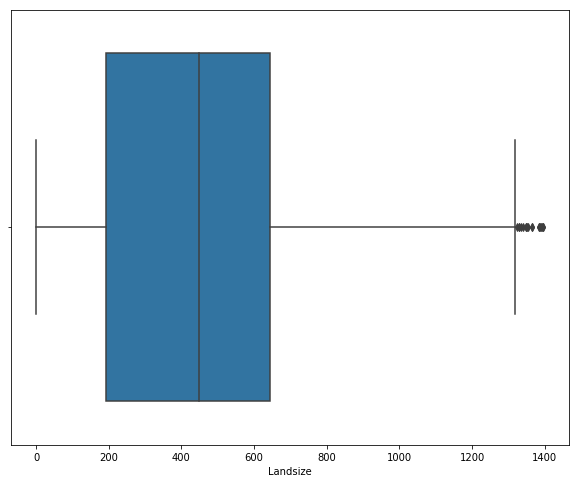

In [14]:
# Visualize Landsize
plt.figure(figsize=(10,8))
plt.hist(df['Landsize'], bins=20, edgecolor='k')
plt.xlabel('Landsize')
plt.ylabel('Frequency')
plt.title('Distribution of Landsize')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['Landsize'])
plt.show()

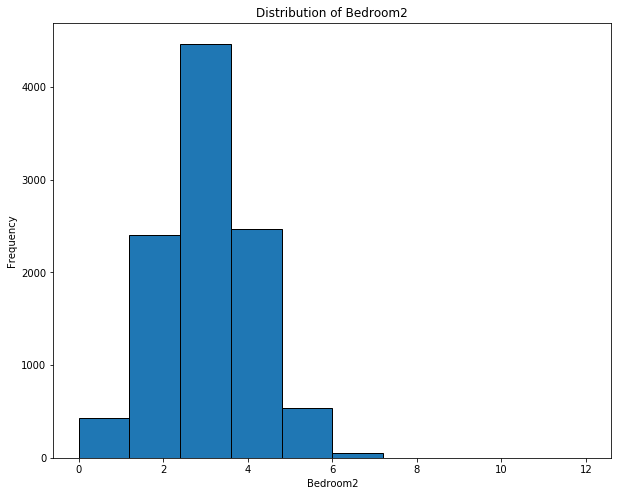

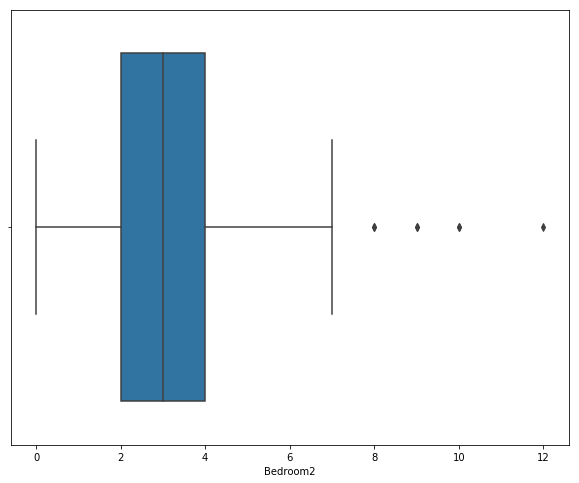

In [15]:
# Visualize Bedroom2
plt.figure(figsize=(10,8))
plt.hist(df['Bedroom2'], bins=10, edgecolor='k')
plt.xlabel('Bedroom2')
plt.ylabel('Frequency')
plt.title('Distribution of Bedroom2')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['Bedroom2'])
plt.show()

In [16]:
# Remove Outliers from bedroom2
df = df[df['Bedroom2']<=7]

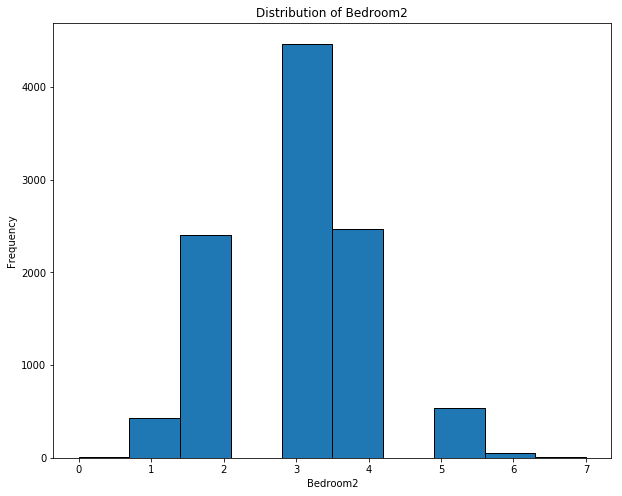

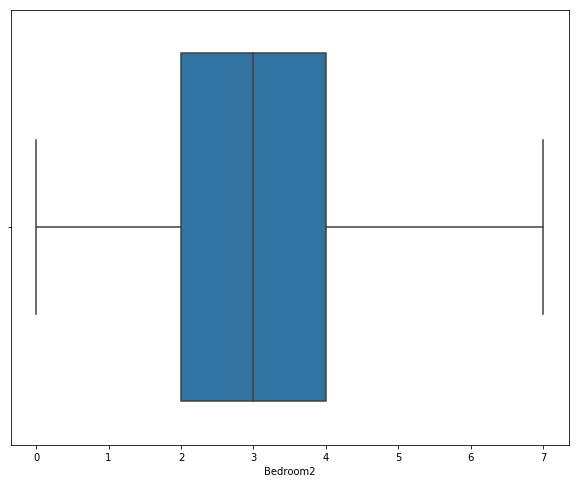

In [17]:
# Visualize Bedroom2
plt.figure(figsize=(10,8))
plt.hist(df['Bedroom2'], bins=10, edgecolor='k')
plt.xlabel('Bedroom2')
plt.ylabel('Frequency')
plt.title('Distribution of Bedroom2')
plt.show()

plt.figure(figsize=(10,8))
sns.boxplot(df['Bedroom2'])
plt.show()

Text(0.5,1,'Distribution of Bathroom')

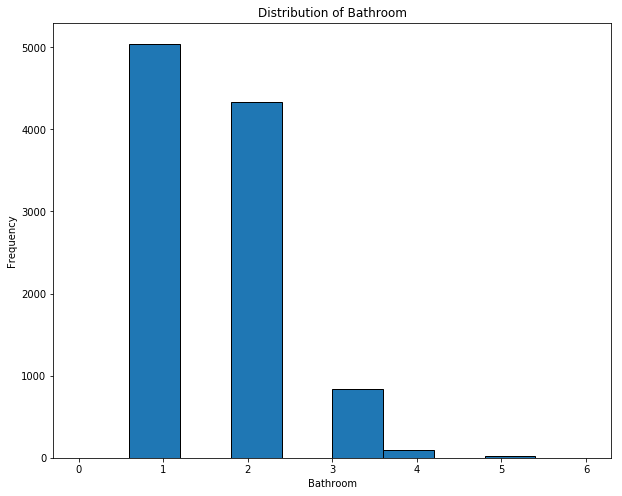

In [18]:
# Visualize Bathroom
plt.figure(figsize=(10,8))
plt.hist(df['Bathroom'], edgecolor='k')
plt.xlabel('Bathroom')
plt.ylabel('Frequency')
plt.title('Distribution of Bathroom')

Text(0.5,1,'Distribution of Rooms')

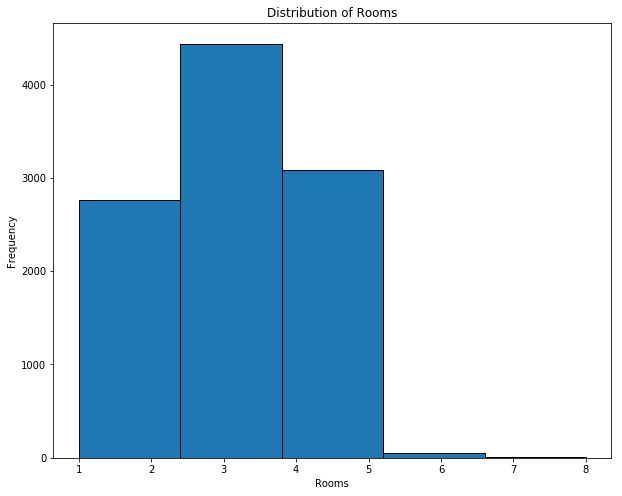

In [19]:
# Visualize Rooms
plt.figure(figsize=(10,8))
plt.hist(df['Rooms'], bins=5, edgecolor='k')
plt.xlabel('Rooms')
plt.ylabel('Frequency')
plt.title('Distribution of Rooms')

In [20]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


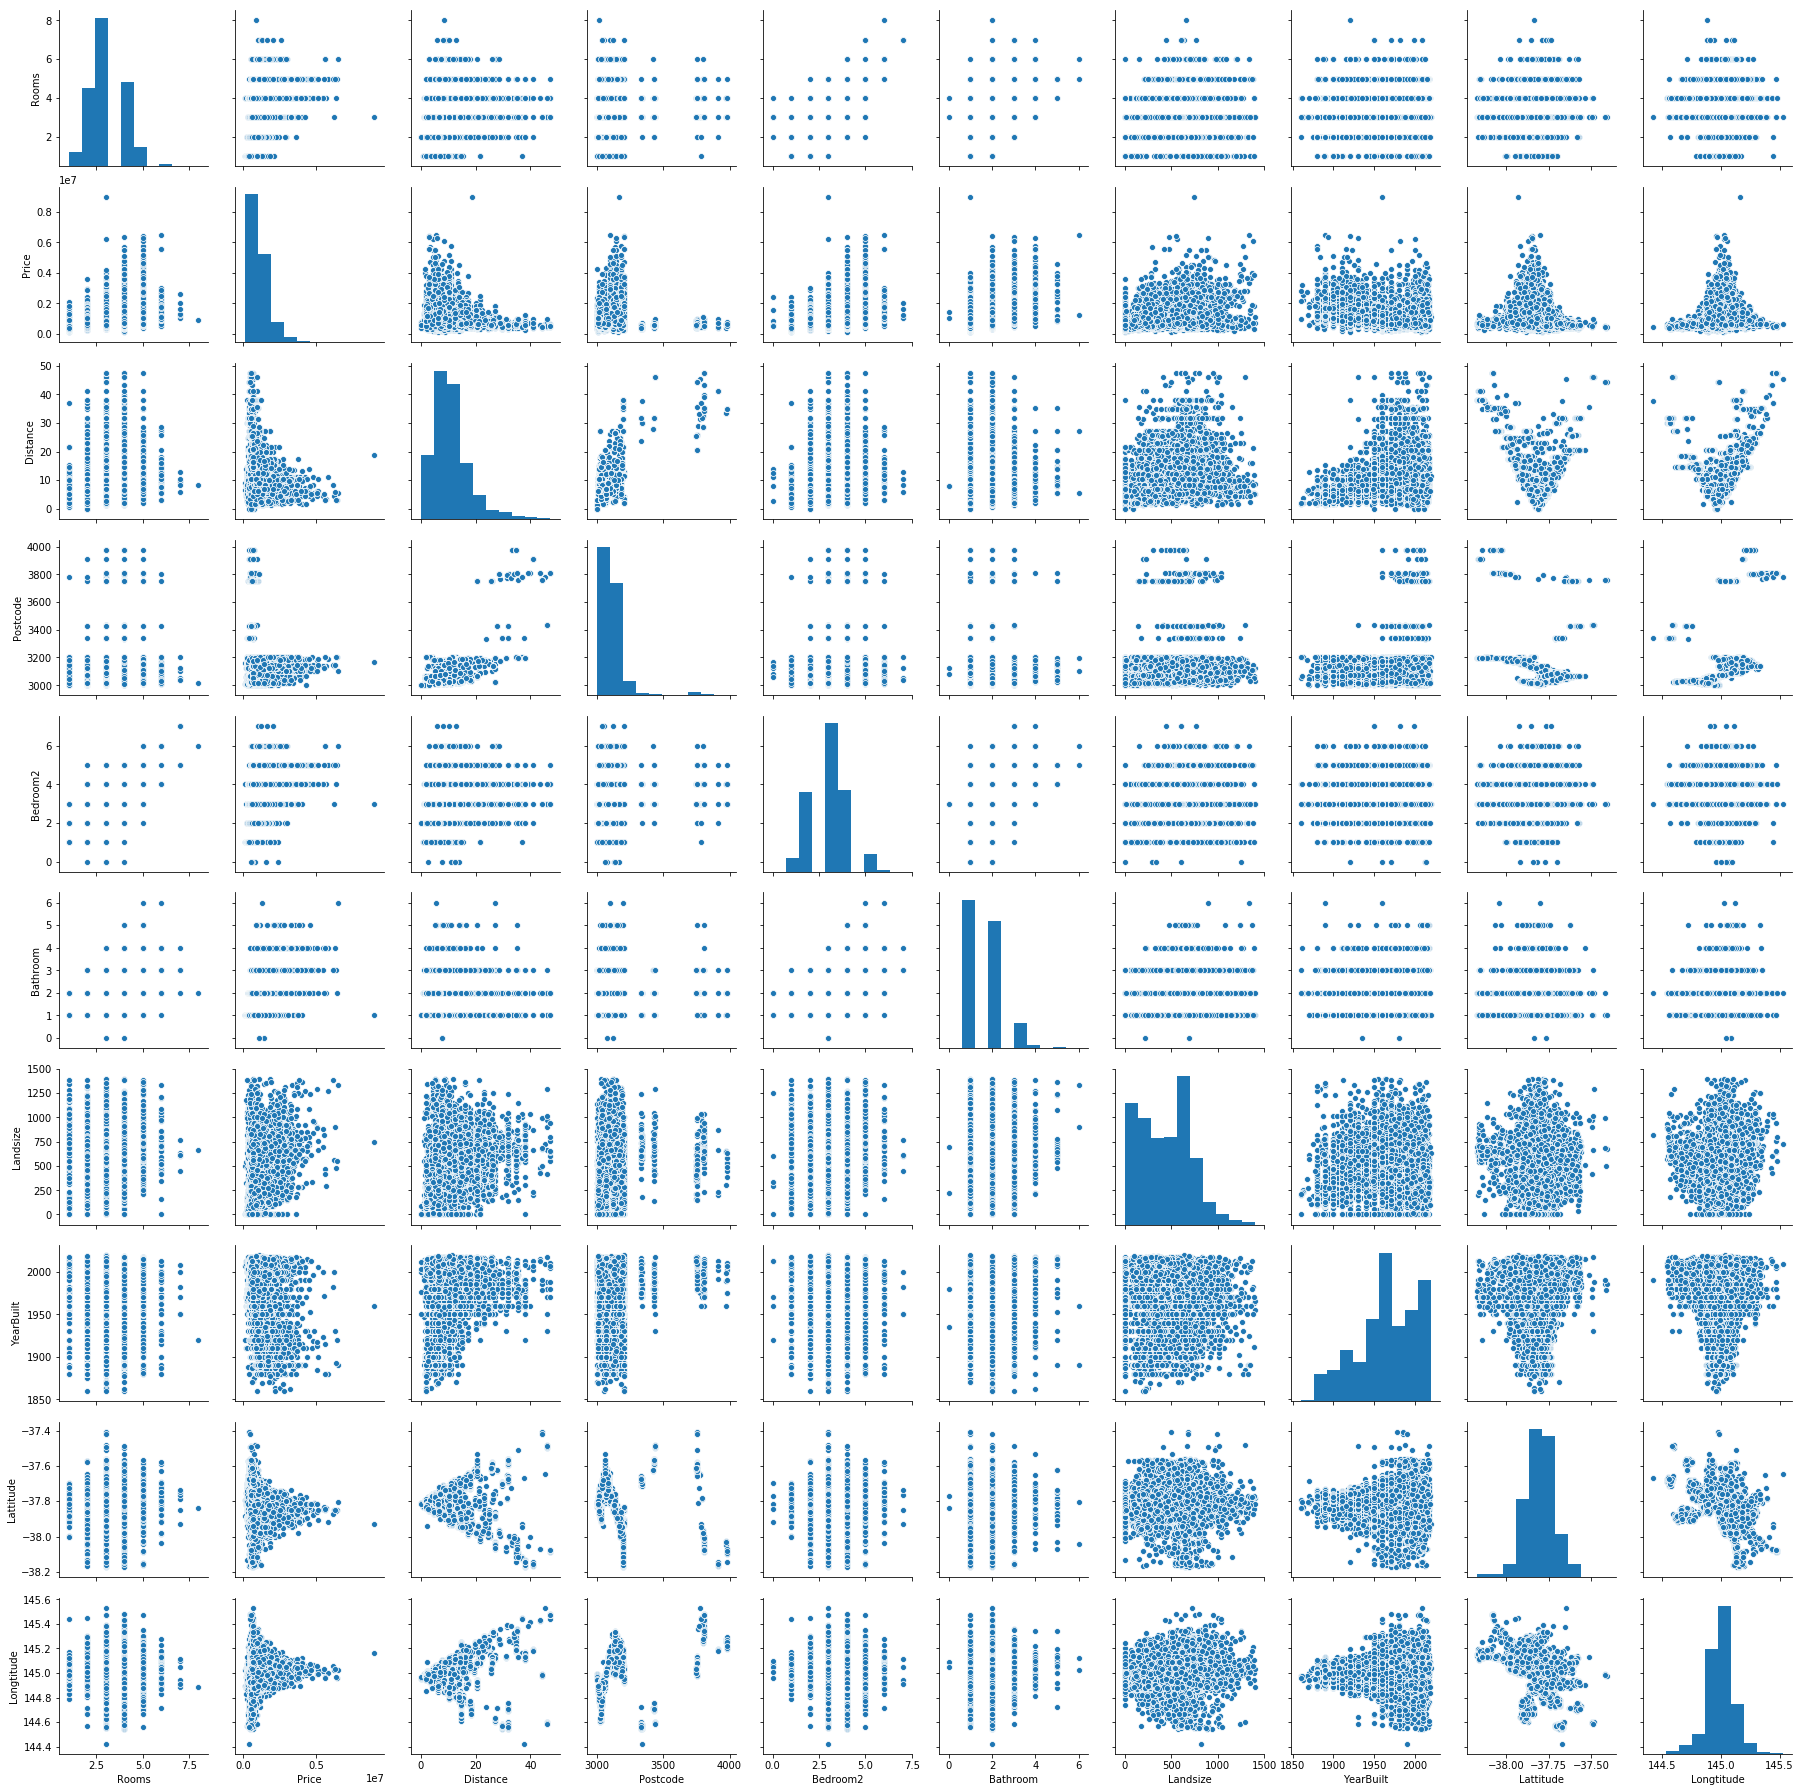

In [21]:
# Visualize pairplot for correlations and distributions
sns.pairplot(df)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x720 with 0 Axes>

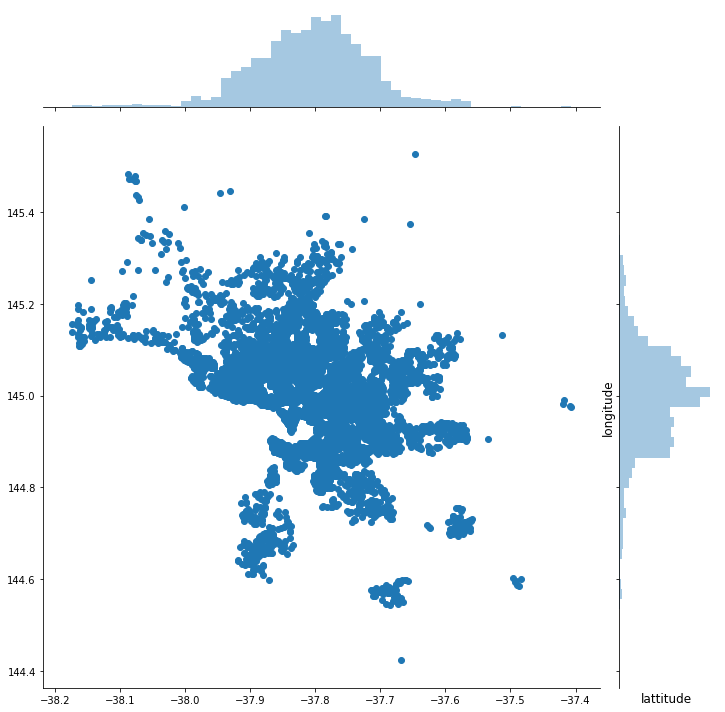

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [22]:
# Visualize concentration of houses in which areas

plt.figure(figsize=(10,10))
sns.jointplot(x=df.Lattitude.values, y=df.Longtitude.values, size=10)
plt.ylabel('longitude', fontsize=12)
plt.xlabel('lattitude', fontsize=12)
plt.show()
sns.despine

### Observations on longitude and lattitude

The highest concentration of houses is found in the area between lattitudes -37.7 to -38.0,  and between longitudes -145.2 and -144.8.

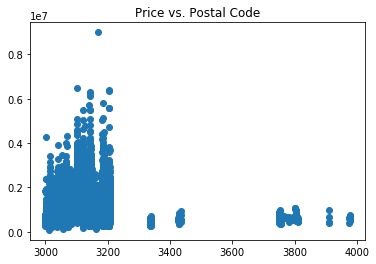

In [23]:
plt.scatter(df.Postcode, df.Price)
plt.title('Price vs. Postal Code')
plt.show()

We can see that most listings are concentration in the postal codes between 3000 and 3200 and the prices increase a little from 3000 to 3200.

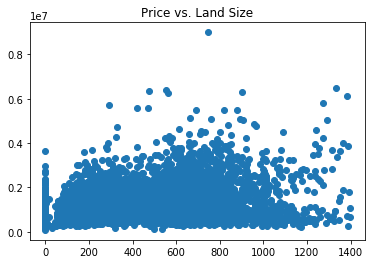

In [24]:
plt.scatter(df.Landsize, df.Price)
plt.title('Price vs. Land Size')
plt.show()

Land size show a slight positive trend but it isn't very strong.

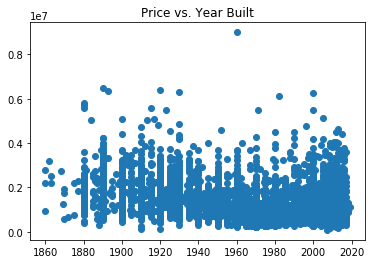

In [25]:
plt.scatter(df.YearBuilt, df.Price)
plt.title('Price vs. Year Built')
plt.show()

The highest concentraion of houses were built after the mid 1900s but there isn't really a correlation with price.

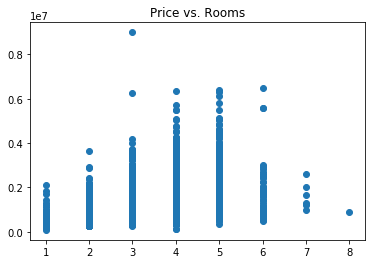

In [26]:
plt.scatter(df.Rooms, df.Price)
plt.title('Price vs. Rooms')
plt.show()

Number of rooms show a similar normal distribution to the bathrooms graph, here the listings increase to most expensive between 4 and 5 rooms. Once again, theres an outlier at 3 rooms.

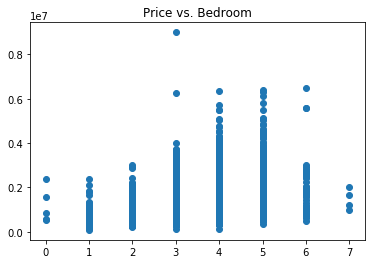

In [27]:
plt.scatter(df.Bedroom2, df.Price)
plt.title('Price vs. Bedroom')
plt.show()

Bedroms show a negative distribution in which listings tend to increas in price as the number of bedrooms increase, but after 5 bedrooms, the prices drop to a lower concentration. 3 bedroom has the most expensive listing however.

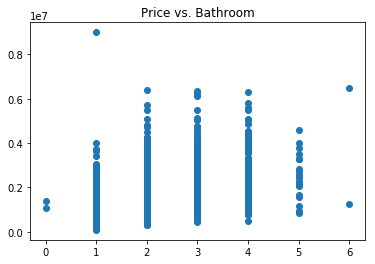

In [28]:
plt.scatter(df.Bathroom, df.Price)
plt.title('Price vs. Bathroom')
plt.show()

The number of bathrooms show almost a normal distribution in which houses with 2 to 4 bathrooms can be more expensive and anymore or anyless tend to have lower prices. Although there is an outlies at one bathroom which has the most expensive listing.

## Baseline regression using OLS.

In [30]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

lg = LinearRegression()

x = df.drop(columns=['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Method', 'Type', 'Price'])
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lg.fit(x_train, y_train)

y_pred = lg.predict(x_train)

print(lg.score(x_test, y_test))

print(cross_val_score(lg, x, y, cv=5))

0.6066002545109355
[0.64389489 0.6138484  0.58175348 0.52111691 0.59305278]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


# Feature engineering and selection

In [32]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


Features to create:

1. Generate Dummies for categorical variables
2. Create Date-Time of Date

In [34]:
# Generate dummies for categorical Variables
features = pd.DataFrame()
features = df.drop(columns=['Address', 'CouncilArea', 'Regionname', 'Suburb', 'SellerG', 'Date'])
features = pd.get_dummies(features)

In [35]:
features.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude', 'Type_h', 'Type_t',
       'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'],
      dtype='object')

In [36]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10344 entries, 2 to 34856
Data columns (total 18 columns):
Rooms         10344 non-null int64
Price         10344 non-null float64
Distance      10344 non-null float64
Postcode      10344 non-null float64
Bedroom2      10344 non-null float64
Bathroom      10344 non-null float64
Landsize      10344 non-null float64
YearBuilt     10344 non-null float64
Lattitude     10344 non-null float64
Longtitude    10344 non-null float64
Type_h        10344 non-null uint8
Type_t        10344 non-null uint8
Type_u        10344 non-null uint8
Method_PI     10344 non-null uint8
Method_S      10344 non-null uint8
Method_SA     10344 non-null uint8
Method_SP     10344 non-null uint8
Method_VB     10344 non-null uint8
dtypes: float64(9), int64(1), uint8(8)
memory usage: 1.3 MB


In [37]:
#Test model again
lg = LinearRegression()

x = features.drop(columns=['Price'])
y = features['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lg.fit(x_train, y_train)

y_pred = lg.predict(x_train)

print(lg.score(x_test, y_test))

print(cross_val_score(lg, x, y, cv=5))

0.6192452407163059
[0.65717114 0.63004065 0.60864099 0.52795837 0.5977291 ]


In [38]:
# Log + 1 transform and Distance
#df = df[df['Landsize']>0]

#df['Distance'] = np.log(df['Distance']+1)
#df['Landsize'] = np.log(df['Landsize'])

#df = df[df['Landsize']>4.2]



# Apply Gradient Boosting Regression

In [39]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators=900, max_depth=3, min_samples_split=5, learning_rate=0.1, loss='ls')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(clf.score(x_test, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8503520404720889


In [40]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,156.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,134.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,245.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,256.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan


In [41]:
# Pass logistic regression model to the RFE constructor
from sklearn.feature_selection import RFE

selector = RFE(clf)
selector = selector.fit(features.drop(columns=['Price'], axis=1), features['Price'])
print(selector.ranking_)

[ 1  1  1  2  1  1  1  1  1  3  7  4  5  9  8 10  6]


In [42]:
rankings = pd.DataFrame({'Features': features.drop(columns=['Price'], axis=1).columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,Rooms,1
7,Lattitude,1
6,YearBuilt,1
5,Landsize,1
8,Longtitude,1
2,Postcode,1
1,Distance,1
4,Bathroom,1
3,Bedroom2,2
9,Type_h,3
